# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data=pd.read_csv("Bank-data.csv")
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [6]:
raw_data=raw_data.drop(columns=["Unnamed: 0"]).copy()


In [15]:
raw_data["y"]=raw_data["y"].map({"yes":1, "no":0})


In [24]:
raw_data.head()
df=raw_data.rename(columns={"y":"exito"})

In [25]:

df.describe(include="all")

,interest_rate,credit,march,may,previous,duration,exito
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [51]:
x=df["duration"]
x_const=sm.add_constant(x)

In [50]:
y=df["exito"]

### Simple Logistic Regression

Run the regression.

In [52]:
reg_log_mod=sm.Logit(y,x_const)

In [53]:
res_reg_log=reg_log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [54]:
res_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  exito   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Oct 2025   Pseudo R-squ.:                  0.2121
Time:                        15:22:15   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [55]:
b1=res_reg_log.params[1]
b0=res_reg_log.params[0]
print(b1)

0.005112218576226694


C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_18676\4257537883.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=res_reg_log.params[1]
C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_18676\4257537883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=res_reg_log.params[0]


### Find the odds of duration

In [74]:
# Entonces el cociente de odds odds2/odds1= exp(b1*diffX1)

def cal_odds_duration(b0, b1, x):
    p_x=np.exp(b0+b1*x)/(1+np.exp(b0+b1*x))
    return p_x/(1-p_x)

In [84]:
odds_f_duration

0       0.332213
1       0.741291
2       0.428970
3       6.091365
4       0.407591
         ...    
513     0.518292
514    11.249665
515     0.804474
516     2.050266
517     0.377504
Name: duration, Length: 518, dtype: float64

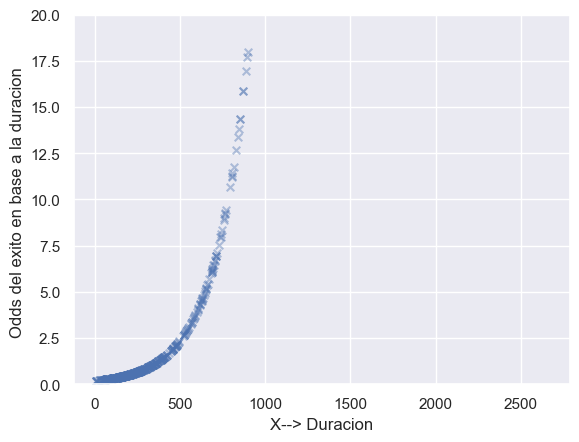

In [86]:
# Calculo odds de duration en funcion de X ya que la probabilidad no es constante depende de x 
odds_f_duration=cal_odds_duration(b0, b1, x)


plt.scatter(x, odds_f_duration, marker="x", s=30, alpha=0.4 )
## plt.scatter(x, odds_solution, marker="x", s=20, alpha=0.3, color="green")
plt.ylabel("Odds del exito en base a la duracion ")
plt.xlabel("X--> Duracion")
plt.ylim(0,20)
plt.show()

In [87]:
#Ahora queremos interpretar como cambia las odds con el un aumento de 1 en la diferencia de duracion 
deltaDuration=1
Odds_delta=np.exp(b1)*deltaDuration
Y_porcentaje=round((Odds_delta*100)-100,2)
print(f"Por cada segundo adicional de duracion aumentan en {Y_porcentaje} % las odds")

Por cada segundo adicional de duracion aumentan en 0.51 % las odds
